In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime
from utils3 import seasonal_plotter
import os

In [ ]:
temps = pd.read_csv('../../data/PBS.csv')
temps.columns

def get_month(mtext):
    result=0;
    if mtext == 'Jan': result = 1
    elif mtext == 'Feb': result = 2
    elif mtext == 'Mar': result = 3
    elif mtext == 'Apr': result = 4
    elif mtext == 'May': result = 5
    elif mtext == 'Jun': result = 6
    elif mtext == 'Jul': result = 7
    elif mtext == 'Aug': result = 8
    elif mtext == 'Sep': result = 9
    elif mtext == 'Oct': result = 10
    elif mtext == 'Nov': result = 11
    elif mtext == 'Dec': result = 12
    return result

def extract_month(df):
    df2 = df.map(get_month)
    return df2

a10 = (
    temps
    .drop(['Index'], axis=1)
    .query('ATC2 == \'A10\'')
    .filter(items=['Year', 'Month', 'Concession', 'Type', 'Cost'])
    .assign(Month = lambda x: extract_month(x.Month))
    .assign(Date = lambda x: pd.to_datetime(dict(year=x.Year, month=x.Month, day=1)))
    .drop(['Year', 'Month'], axis=1)
    .set_index('Date')
    .resample('1M')
    .sum()
    .assign(Cost = lambda x: x.Cost/1e6)
)

seasonal_plotter(a10, 'Cost', filename='a10.jpg', period='year')

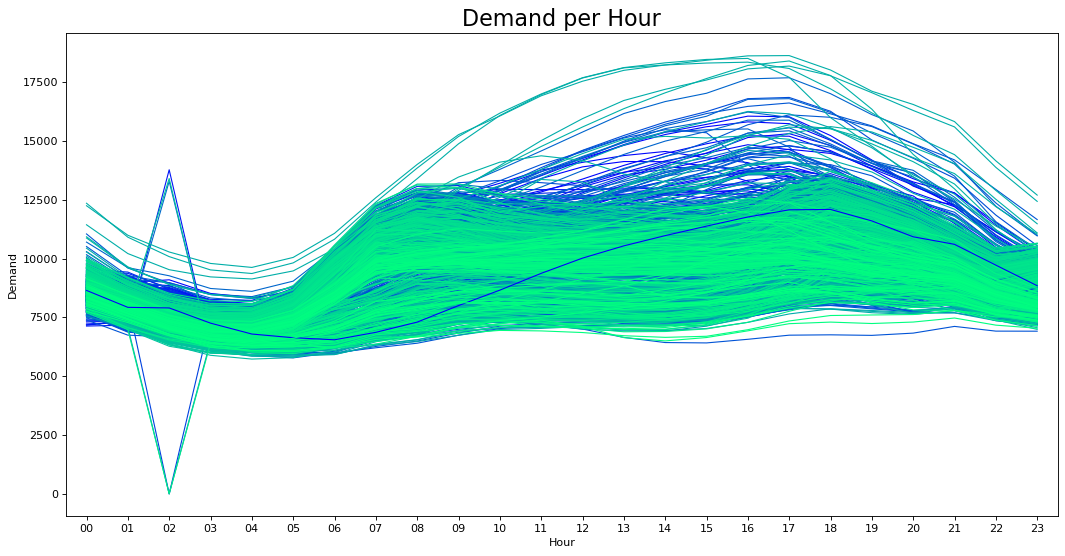

In [2]:
# ******************************************************************************************
# ************************************   Part 1   ******************************************
# ******************************************************************************************

temps = pd.read_csv('../../data/vic_elec.csv', parse_dates=[['Date', 'Time']])
elec_demand = (
    temps
    .set_index('Date_Time')
    .drop(['Index', 'Date.1', 'Temperature', 'Holiday'], axis=1)
    .resample('1H')
    .sum()
)

seasonal_plotter(elec_demand, 'Demand', period='day', filename='Electricity Demand')

In [ ]:
series_name = 'Demand'
df = elec_demand.copy() #change to a10
df.index.names = ['Date']
df.reset_index(inplace=True)

min_y = df[series_name].min()
max_y = df[series_name].max()
min_y = min_y-(max_y-min_y)*0.05
max_y = max_y+(max_y-min_y)*0.05

fig, ax = plt.subplots(figsize=(16, 8), dpi=80)

df['period_col'] = [d.strftime('%Y-%U') for d in df.Date]  # week
df['period_col_child'] = df.Date
periods = df['period_col'].unique()
periods_count = len(periods)
min_x = -0.5 # 7 days in a week, but looking hourly
max_x = (24*7)-.5
x_units = 'Day'
cmap = mpl.cm.winter
norm = mpl.colors.Normalize(vmin=0, vmax=periods_count)

for i in range(1,periods_count-1):
    #get period
    the_period = periods[i] 

    #get child period for period
    to_plot = df.query('period_col == @the_period').filter(['period_col_child',series_name]) 
    to_plot['TempDate'] = pd.date_range("2012-01-01", periods=to_plot.shape[0], freq="H")

    # print(to_plot.shape)
    #plot line
    ax.plot(to_plot['TempDate'], to_plot[series_name], color=cmap(norm(i)), linewidth=1) 
plt.show()

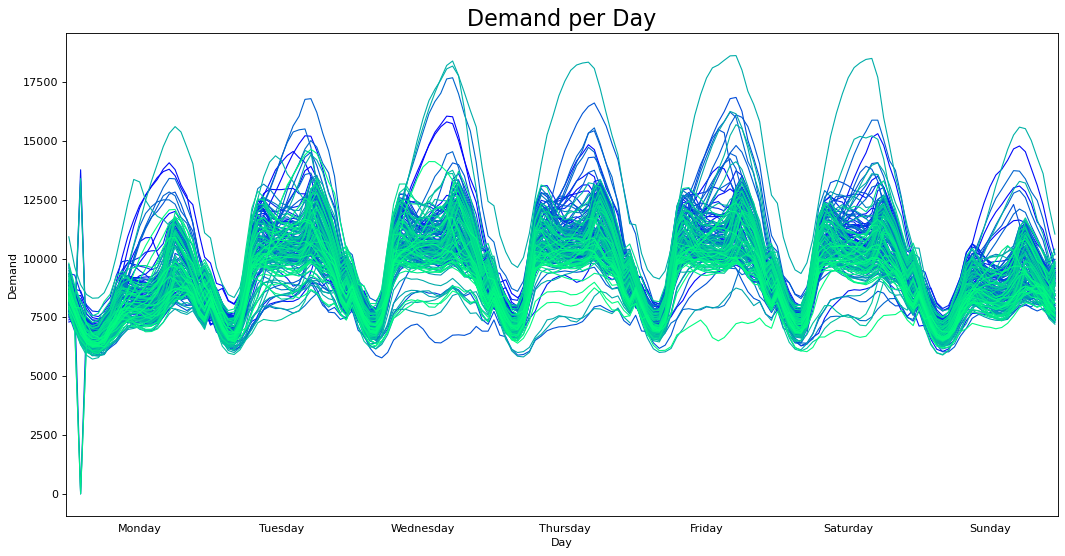

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime
from utils3 import seasonal_plotter
import os

temps = pd.read_csv('../../data/vic_elec.csv', parse_dates=[['Date', 'Time']])
elec_demand = (
    temps
    .set_index('Date_Time')
    .drop(['Index', 'Date.1', 'Temperature', 'Holiday'], axis=1)
    .resample('1H')
    .sum()
)
seasonal_plotter(elec_demand, 'Demand', period='week', filename='Electricity Demand')


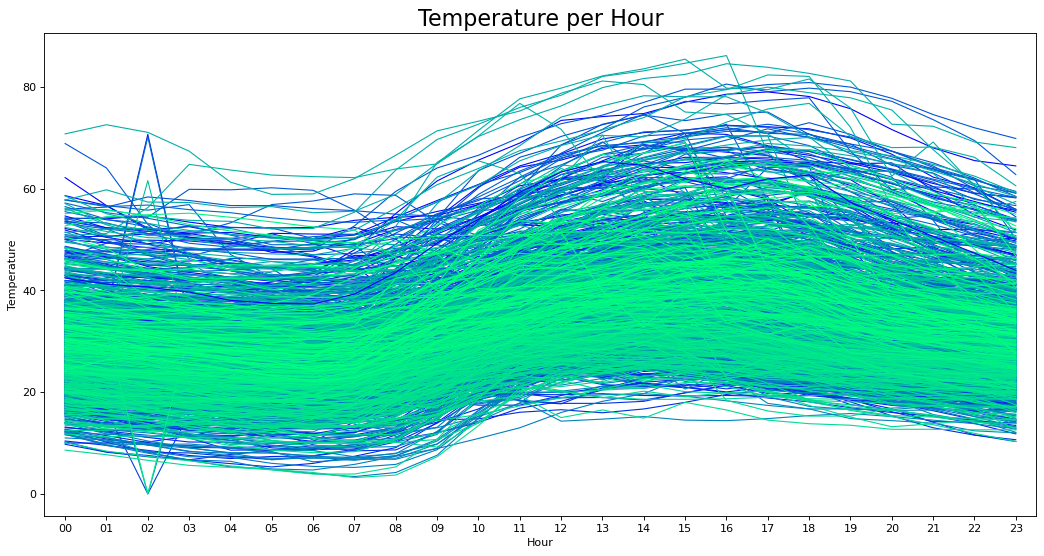

In [3]:
elec_demand = (
    temps
    .set_index('Date_Time')
    .drop(['Index', 'Date.1', 'Demand', 'Holiday'], axis=1)
    .resample('1H')
    .sum()
)
seasonal_plotter(elec_demand, 'Temperature', period='day', filename='Electricity Demand')
